### столбчатая диаграмма (bar chart)

Столбчатая диаграмма также максимально проста: по оси x откладывается некоторый категориальный признак, для каждой категории которого рассчитан некоторый показатель (средняя цена товаров, медианная стоимость нефти, максимальная зафиксированная концентрация газа). Высота столбца и есть значение этого показателя. 

Основное применение столбчатых диаграмм в Data Science — сравнение категорий друг с другом. Например, сравнение ресторанов по суммарной прибыли, сравнение средних расходов пользователей, сравнение медианной стоимости квартир по районам и т. д.

Преимущество столбчатых диаграмм над круговыми в том, что в столбчатые диаграммы можно добавлять разделение по другим категориальным признакам и рассматривать совместное распределение показателей, тем самым повышая информативность. Такие диаграммы называются многоуровневыми.

Пример:

В качестве примера приведём две диаграммы стоимости женского нижнего белья на сайте Amazon.

На левой диаграмме изображены средние цены товаров для каждого бренда. На правой диаграмме изображены те же цены, но с разделением цветом по категориям товаров (Bras — бюстгальтеры, Panties — трусы). Правая диаграмма является многоуровневой столбчатой диаграммой.

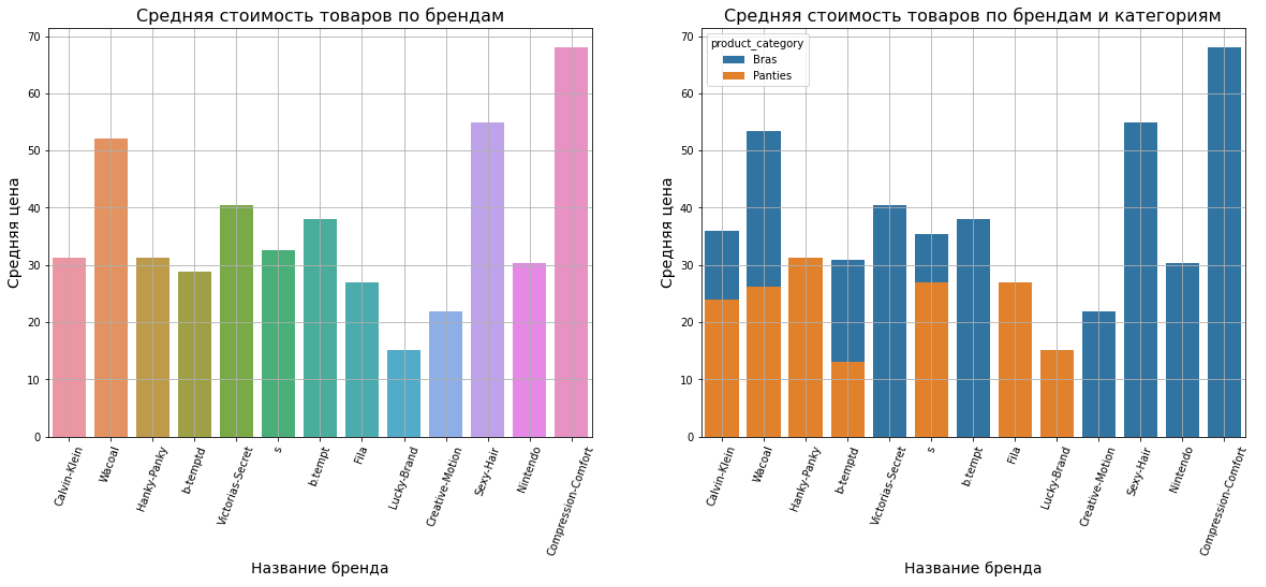

[Источник данных](https://www.kaggle.com/PromptCloudHQ/innerwear-data-from-victorias-secret-and-others)

*Из левой диаграммы видно, что наибольшую среднюю цену имеют товары бренда Compression-Comfort, а наименьшую — Lucky-Brand.*

*Из правого графика можно заметить, что средняя цена трусов всегда ниже средней цены бюстгальтеров.*

*Кроме того, для некоторых брендов в данных есть информация только о бюстгальтерах или только о трусах (их столбцы окрашены только синим или только оранжевым цветом).*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

amazon_data = pd.read_csv('data/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b.tempt'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64')
amazon_data['brand_name'].unique()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()